In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
df=pd.read_csv("credit_card_fraud_dataset.csv")
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [11]:
print(df.columns)

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')


In [15]:
df.drop(columns=['TransactionID', 'TransactionDate'], inplace=True)  
df = pd.get_dummies(df) 
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_no_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_with_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_with_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history_no_dropout = model_no_dropout.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, verbose=0)
history_with_dropout = model_with_dropout.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, verbose=0)

test_loss_no_dropout, test_acc_no_dropout = model_no_dropout.evaluate(X_test_scaled, y_test, verbose=0)
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(X_test_scaled, y_test, verbose=0)

In [26]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

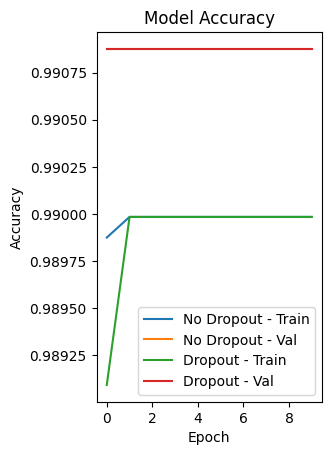

In [29]:
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['accuracy'], label='No Dropout - Train')
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout - Val')
plt.plot(history_with_dropout.history['accuracy'], label='Dropout - Train')
plt.plot(history_with_dropout.history['val_accuracy'], label='Dropout - Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

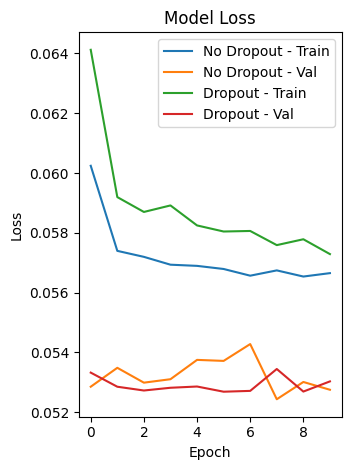

In [31]:
plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['loss'], label='No Dropout - Train')
plt.plot(history_no_dropout.history['val_loss'], label='No Dropout - Val')
plt.plot(history_with_dropout.history['loss'], label='Dropout - Train')
plt.plot(history_with_dropout.history['val_loss'], label='Dropout - Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
comparison = pd.DataFrame({
    'Model': ['Without Dropout', 'With Dropout'],
    'Test Accuracy': [round(test_acc_no_dropout, 4), round(test_acc_with_dropout, 4)],
    'Test Loss': [round(test_loss_no_dropout, 4), round(test_loss_with_dropout, 4)]
})
print("\nModel Performance Comparison:\n")
print(comparison.to_string(index=False))


Model Performance Comparison:

          Model  Test Accuracy  Test Loss
Without Dropout         0.9894     0.0601
   With Dropout         0.9894     0.0599


In [35]:
print("\n Analysis:")
print("Dropout regularization reduces overfitting by randomly disabling neurons during training.")
print("As seen in the validation curves and test metrics, the model with dropout may generalize better when")
print("the non-dropout model shows signs of overfitting (e.g., high training accuracy but lower val/test accuracy).")


 Analysis:
Dropout regularization reduces overfitting by randomly disabling neurons during training.
As seen in the validation curves and test metrics, the model with dropout may generalize better when
the non-dropout model shows signs of overfitting (e.g., high training accuracy but lower val/test accuracy).
